In [1]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
base_dir = '/Users/anasarodake/DataSpell/UnI-ML-DL/video_Ki/images'
classes = ['smile' , 'neutral']

In [3]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [4]:
IMG_SHAPE = 250

batch_size =50

image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    #zoom_range=0.5,
    horizontal_flip=True,
    #width_shift_range=0.15,
    #height_shift_range=0.15
)

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    shuffle=True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode='sparse',
    classes=classes
)

Found 1643 images belonging to 2 classes.


In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
#dieser ablock sucht nach Bildern, die evtl. einen Fehler bei ber Implimentierung verursachen und zeigt sie auf
import PIL
from pathlib import Path
path = Path(train_dir).rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

In [7]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


val_data_gen =  image_gen.flow_from_directory(
    directory=val_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')

Found 230 images belonging to 2 classes.


In [8]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


test_data_gen =  image_gen.flow_from_directory(
    directory=test_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')




Found 687 images belonging to 2 classes.


In [9]:
model = Sequential()


model.add(Conv2D(4,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Conv2D(32, 3 ,padding='same' , activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))






model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.4))

#
model.add(Dense(512 ,  activation='relu'))


model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

Metal device set to: Apple M1


2022-04-20 16:03:46.359948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-20 16:03:46.360241: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [11]:
#from tensorflow.python.keras.callbacks import EarlyStopping
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience= 3 , verbose=1)

epochs = 20
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))), #alle Bilder / 10
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))),
    #callbacks=[callback]
)

Epoch 1/20


2022-04-20 16:03:47.016598: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-04-20 16:03:47.334430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 1.5419 - accuracy: 0.5630

2022-04-20 16:04:01.887220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 15s 448ms/step - loss: 1.5419 - accuracy: 0.5630 - val_loss: 0.6851 - val_accuracy: 0.5130
Epoch 2/20
33/33 [==============================] - 14s 433ms/step - loss: 0.6811 - accuracy: 0.5545 - val_loss: 0.6310 - val_accuracy: 0.8391
Epoch 3/20
33/33 [==============================] - 14s 433ms/step - loss: 0.6222 - accuracy: 0.6634 - val_loss: 0.5398 - val_accuracy: 0.8435
Epoch 4/20
33/33 [==============================] - 14s 433ms/step - loss: 0.5296 - accuracy: 0.7432 - val_loss: 0.4793 - val_accuracy: 0.8130
Epoch 5/20
33/33 [==============================] - 15s 437ms/step - loss: 0.4596 - accuracy: 0.8095 - val_loss: 0.3567 - val_accuracy: 0.8957
Epoch 6/20
33/33 [==============================] - 14s 435ms/step - loss: 0.3953 - accuracy: 0.8436 - val_loss: 0.3278 - val_accuracy: 0.8652
Epoch 7/20
33/33 [==============================] - 14s 430ms/step - loss: 0.3392 - accuracy: 0.8655 - val_loss: 0.2580 - val_accuracy: 0.9087
Epoch 8/20

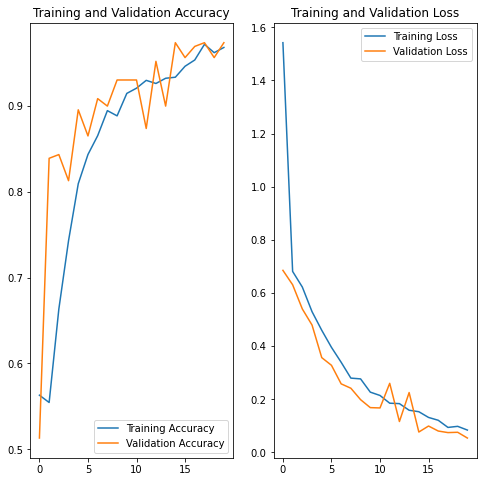

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
evaluated = model.evaluate(
    x = test_data_gen)

14/14 [==============================] - 2s 121ms/step - loss: 0.0693 - accuracy: 0.9753


In [14]:
predict_dir_smile = os.path.join(base_dir, 'test/smile')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_smile_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir_smile,
    classes = classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 354,
    class_mode= 'sparse'
)



predicted_smile = model.predict(x = predict_smile_data_gen)



for value in predicted_smile:
    print("\nLächeln Bild, die KI Werte:    lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ) , "   richtig geschätzt:  " ,  (value[0] > value[1]) )

Found 354 images belonging to 2 classes.


2022-04-20 16:08:40.299687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Lächeln Bild, die KI Werte:    lachen:97.69      Neutral:2    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.99      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.12      Neutral:1    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:18.6      Neutral:81    richtig geschätzt:   False

Lächeln Bild, die KI Werte:    lachen:99.17      Neutral:1    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.96      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:84.05      Neutral:16    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.85      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.97      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.86      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:91.24      Neutral:9    richtig geschätzt:   True

Lächeln Bild, die 

In [15]:
index = 0
false_images = np.array([])
for value in predicted_smile:
    if value[0] < value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1



falsch geschätztes BILD:    lachen: 18.6      Neutral: 81        Bild_Index: 3
falsch geschätztes BILD:    lachen: 15.35      Neutral: 85        Bild_Index: 27


In [16]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images), " von : ", len (predicted_smile))
evaluated = model.evaluate(
    x = predict_smile_data_gen)

zahl der Falsch geschätzten Bilder:  2  von :  354
1/1 [==============================] - 1s 1s/step - loss: 0.0185 - accuracy: 0.9944


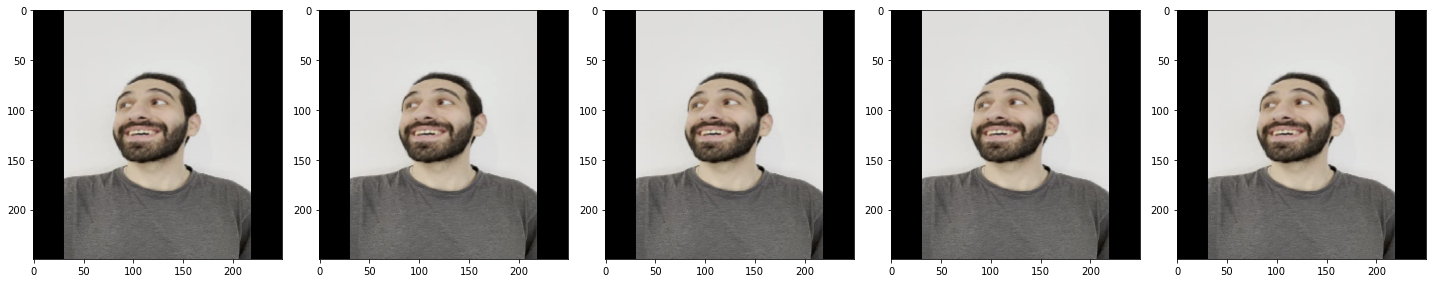

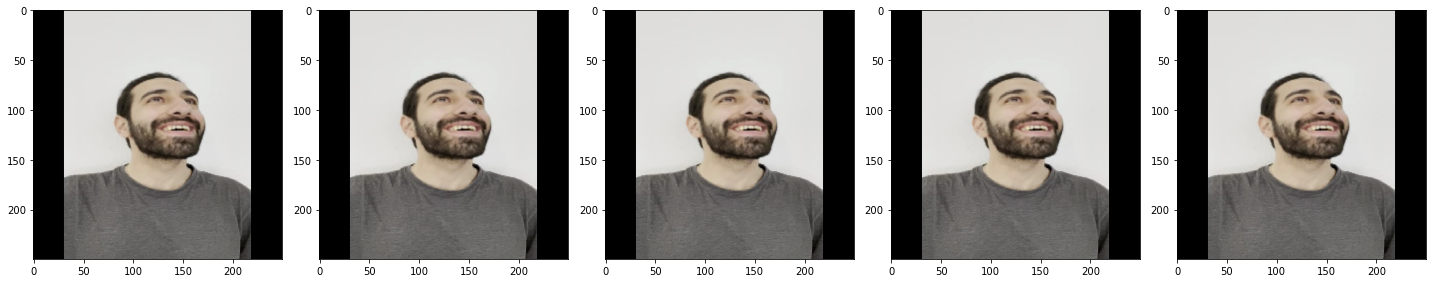

In [17]:
for pic in false_images:
    augmented_images = [predict_smile_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)

In [18]:
predict_dir = os.path.join(base_dir, 'test/neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 333,
    class_mode= 'sparse')



predicted = model.predict(x = predict_neutral_data_gen)
for value in predicted:
    print("Neutrales Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))

Found 333 images belonging to 1 classes.
Neutrales Bild, die KI Werte:   lachen:1.57      Neutral:98
Neutrales Bild, die KI Werte:   lachen:15.49      Neutral:85
Neutrales Bild, die KI Werte:   lachen:0.15      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.13      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.23      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.29      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.05      Neutral:100
Neutrales Bild, die KI Werte:   lachen:2.36      Neutral:98
Neutrales Bild, die KI Werte:   lachen:0.25      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.39      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.43      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.01      Neutral:100
Neutrales Bild, die KI Werte:   lachen:22.17      Neutral:78
Neutrales Bild, die KI Werte:   lachen:0.01      Neutral:100
Neutrales Bild, die KI Werte:   lachen:3.05    

In [19]:
index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1

falsch geschätztes BILD:    lachen: 59.84      Neutral: 40        Bild_Index: 43
falsch geschätztes BILD:    lachen: 76.5      Neutral: 23        Bild_Index: 46
falsch geschätztes BILD:    lachen: 99.01      Neutral: 1        Bild_Index: 49
falsch geschätztes BILD:    lachen: 78.54      Neutral: 21        Bild_Index: 67
falsch geschätztes BILD:    lachen: 65.94      Neutral: 34        Bild_Index: 85
falsch geschätztes BILD:    lachen: 66.69      Neutral: 33        Bild_Index: 114
falsch geschätztes BILD:    lachen: 74.4      Neutral: 26        Bild_Index: 123
falsch geschätztes BILD:    lachen: 66.45      Neutral: 34        Bild_Index: 152
falsch geschätztes BILD:    lachen: 63.59      Neutral: 36        Bild_Index: 168
falsch geschätztes BILD:    lachen: 53.87      Neutral: 46        Bild_Index: 176
falsch geschätztes BILD:    lachen: 93.17      Neutral: 7        Bild_Index: 205
falsch geschätztes BILD:    lachen: 97.05      Neutral: 3        Bild_Index: 237
falsch geschätztes BILD:  

In [20]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images) , " von : ", len (predicted))

zahl der Falsch geschätzten Bilder:  15  von :  333


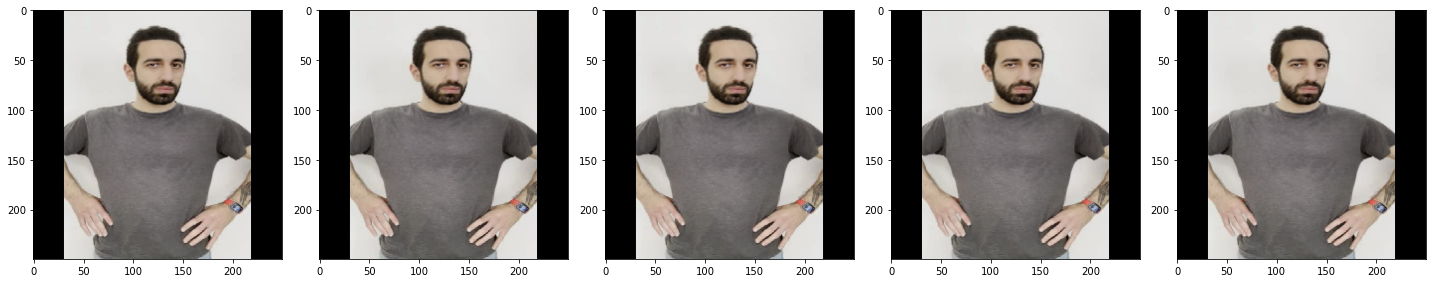

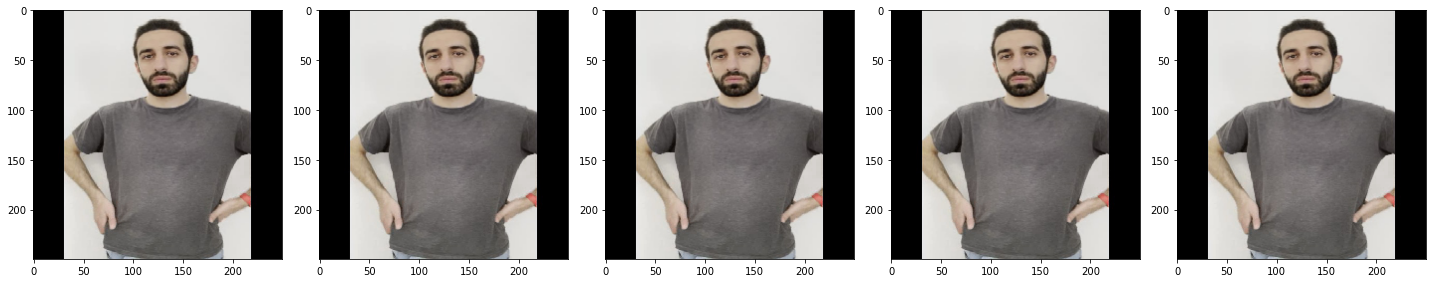

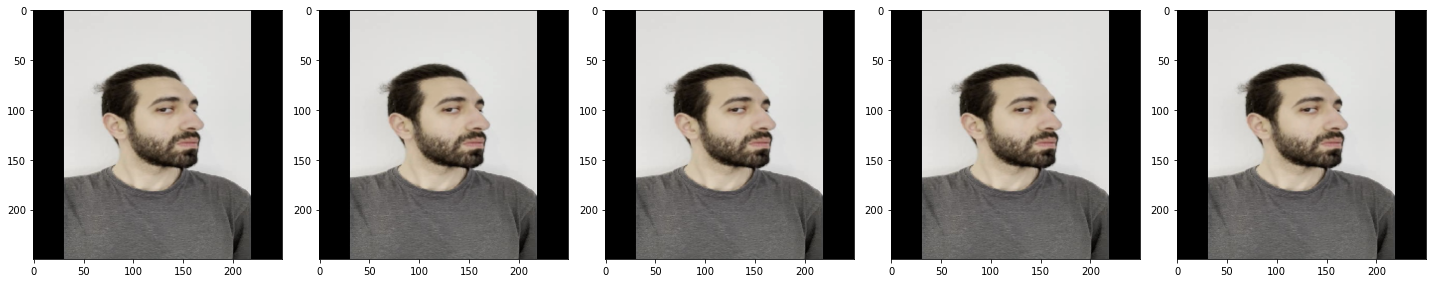

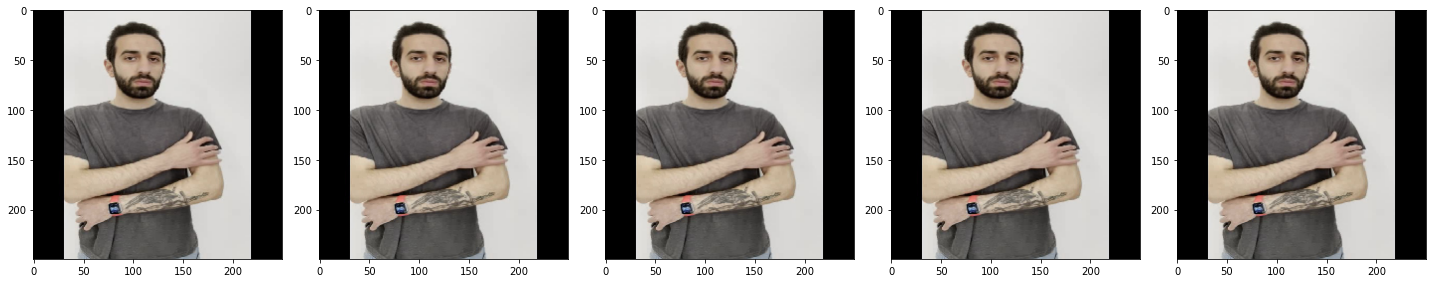

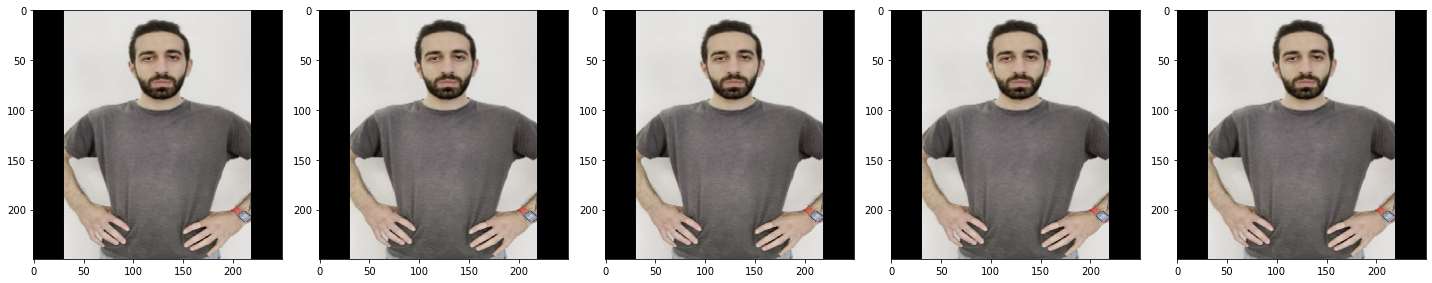

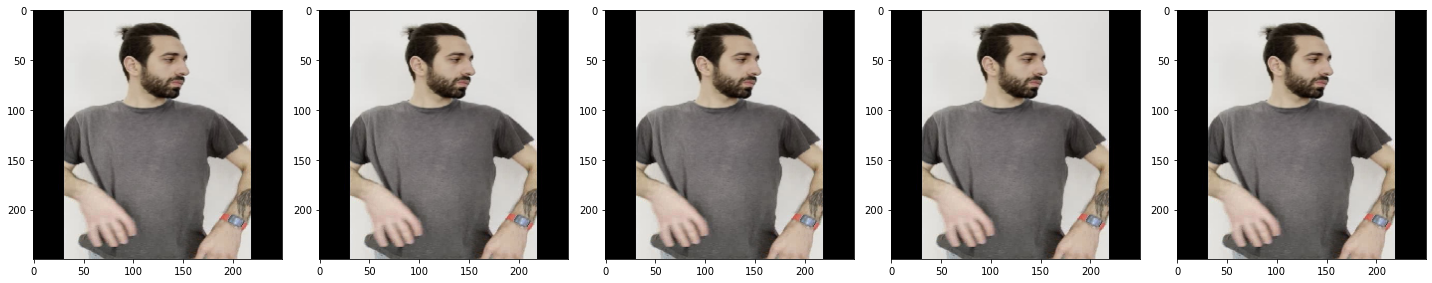

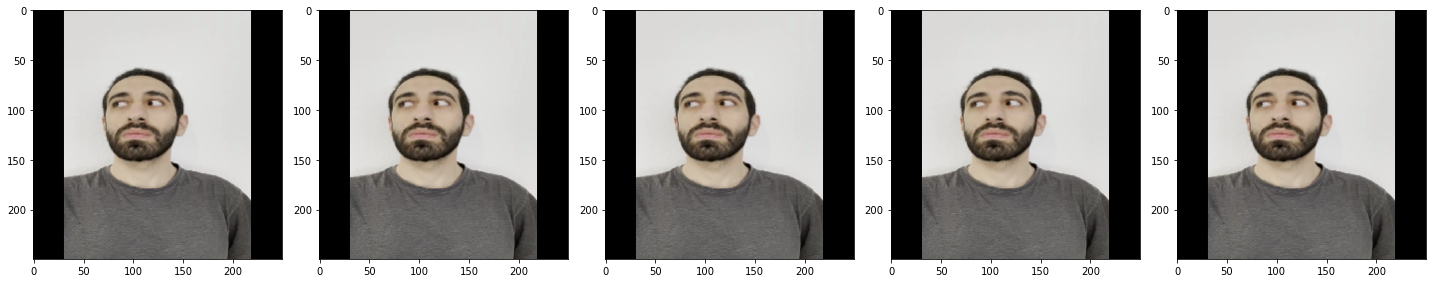

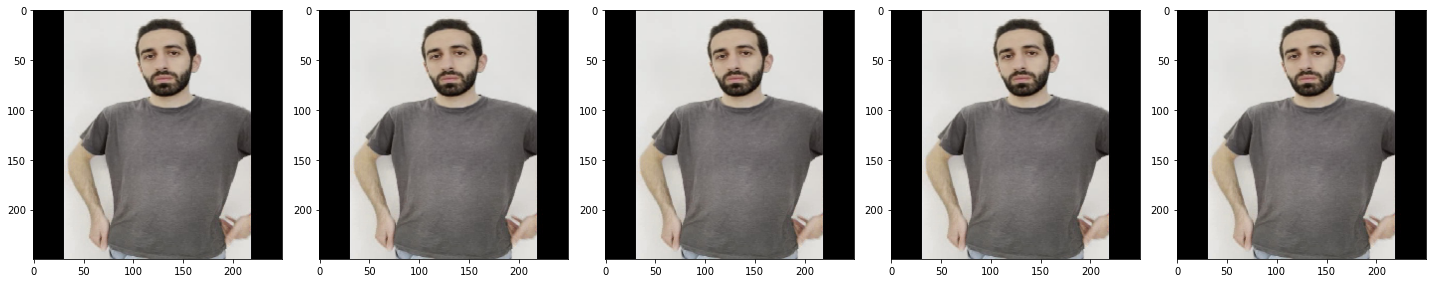

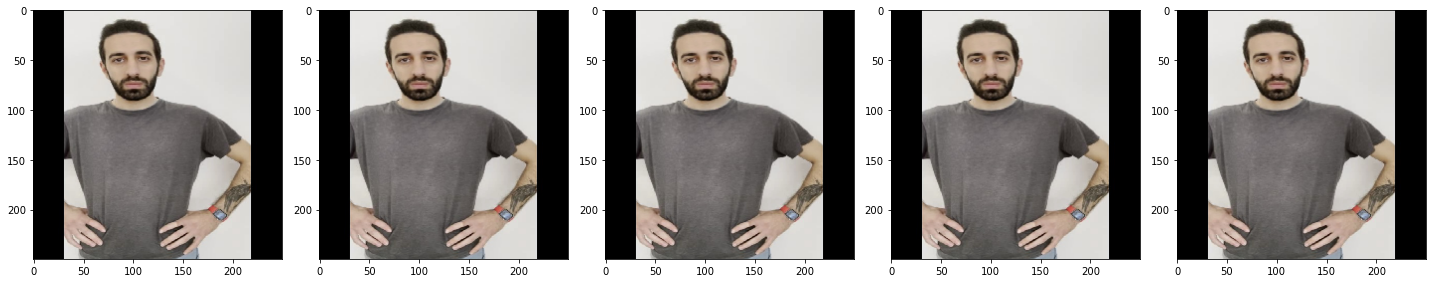

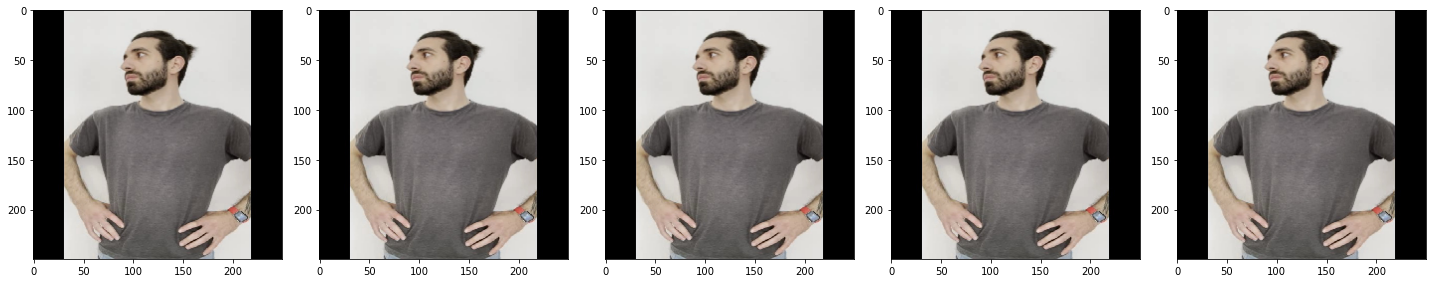

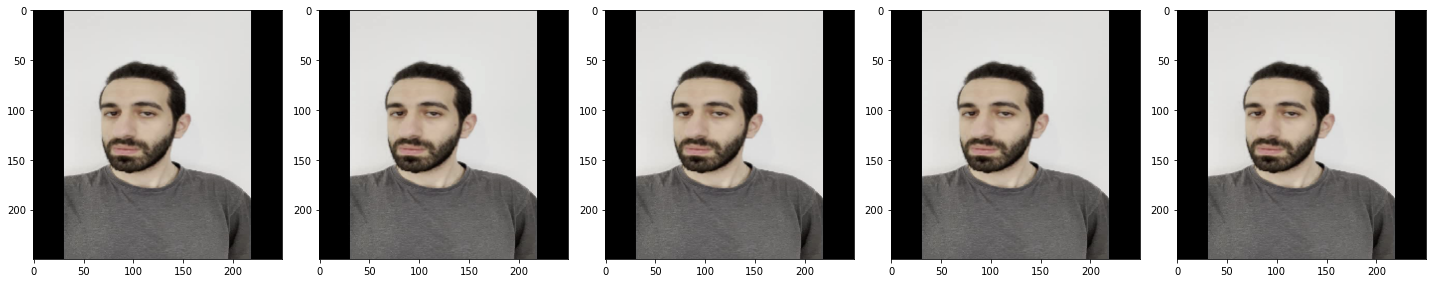

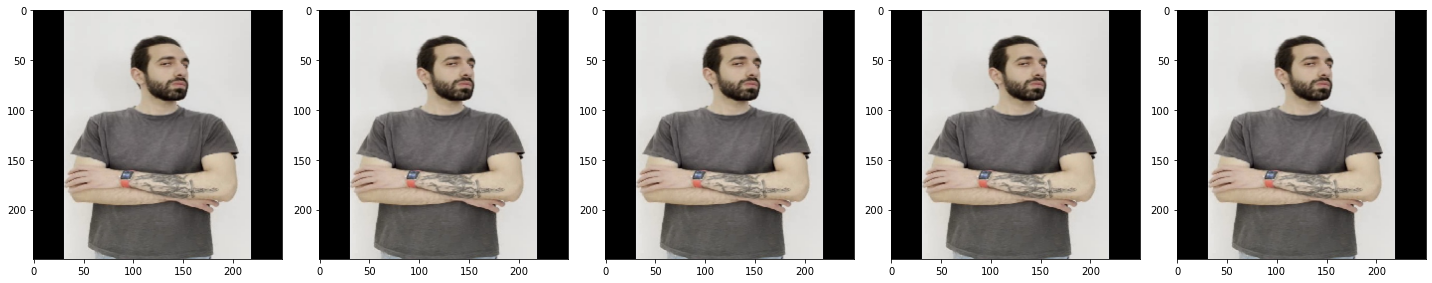

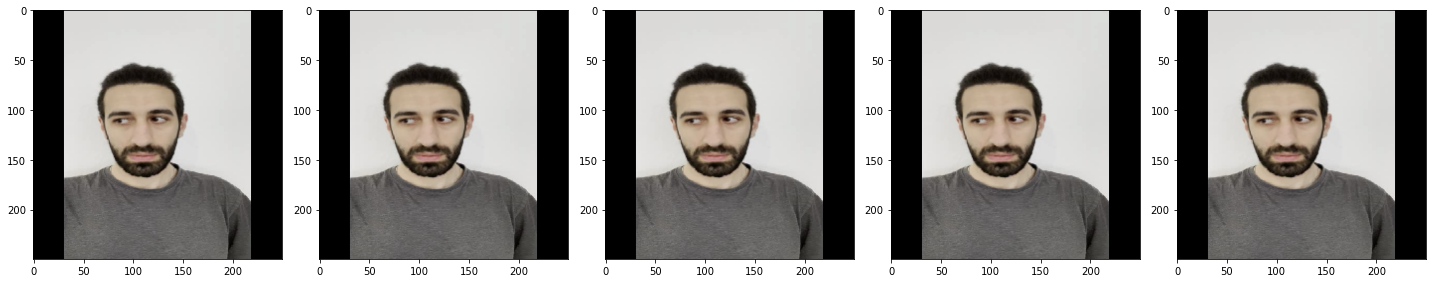

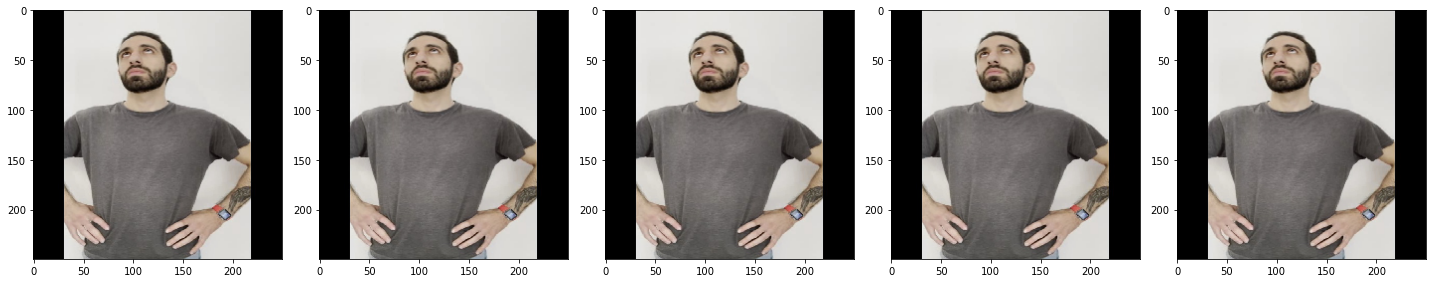

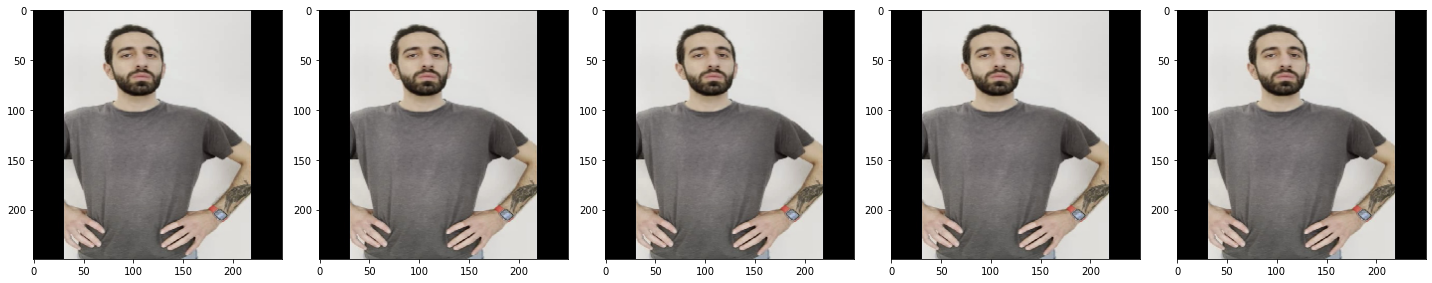

In [21]:
for pic in false_images:
    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)

Found 43 images belonging to 2 classes.
1/1 [==============================] - 0s 192ms/step - loss: 0.2272 - accuracy: 0.9767
lach Bild, die KI Werte:   lachen:2.91      Neutral:97
lach Bild, die KI Werte:   lachen:0.12      Neutral:100
lach Bild, die KI Werte:   lachen:0.2      Neutral:100
lach Bild, die KI Werte:   lachen:47.96      Neutral:52
lach Bild, die KI Werte:   lachen:1.37      Neutral:99
lach Bild, die KI Werte:   lachen:0.93      Neutral:99
lach Bild, die KI Werte:   lachen:0.16      Neutral:100
lach Bild, die KI Werte:   lachen:0.06      Neutral:100
lach Bild, die KI Werte:   lachen:0.07      Neutral:100
lach Bild, die KI Werte:   lachen:0.17      Neutral:100
lach Bild, die KI Werte:   lachen:0.77      Neutral:99
lach Bild, die KI Werte:   lachen:8.33      Neutral:92
lach Bild, die KI Werte:   lachen:0.28      Neutral:100
lach Bild, die KI Werte:   lachen:99.93      Neutral:0
lach Bild, die KI Werte:   lachen:0.13      Neutral:100
lach Bild, die KI Werte:   lachen:42.83 

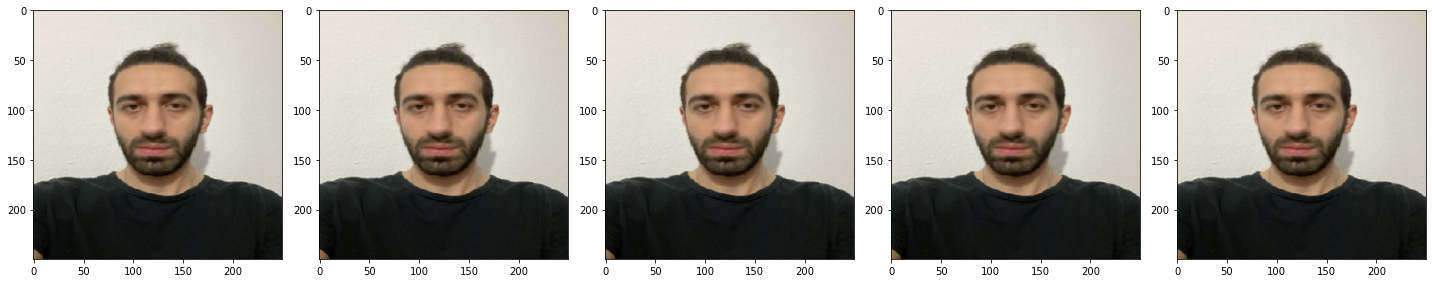

In [22]:
predict_dir = os.path.join("/Users/anasarodake/anas_fotos/predict/", 'neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 333,
    #classes= classes,
    class_mode= 'sparse')



predicted1 = model.evaluate(x = predict_neutral_data_gen)
predicted = model.predict(x = predict_neutral_data_gen)


for value in predicted:
    print("lach Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))
    index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format(
            round(value[0] * 100, 2), round(value[1] * 100), index))
        false_images = np.append(false_images, int(index))
    index = index + 1
print("zahl der Falsch geschätzten Bilder: ", len(false_images), " von : ", len(predicted))
for pic in false_images:
    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)